In [70]:
from tqdm import tqdm
import smiles_generate as sg
import visualize as vis
import importlib
import utils
import subprocess
import data_process as dp
import pandas as pd
import numpy as np
importlib.reload(vis)
importlib.reload(sg)
importlib.reload(utils)
importlib.reload(dp)

<module 'data_process' from '/work/01/gq54/p23004/electret_cal/data_process.py'>

## FFKM 与 基底的反应

**生成了smiles以及name的list**

In [13]:
name_list = []
smiles_list = []
base = 'C=CCN1C(=O)N(C(=O)N(C1=O)CC=C)CC=C'
for direction in ['L','R']:
    for c in [3]:
        # for m in [1,2,3]:
        for m in [1,2,3]:
            # for n in [0,2,4,6]:
            for n in [0,2]:
                FFKM,connection_point = sg.FFKM_builder(m = m,n = n, c=c,connection_direction=direction)
                crossed_mol = sg.crosslink_reaction(base,FFKM,connection_point)
                name_list.append(f'taic{direction}M{m}N{n}C{c}')
                smiles_list.append(crossed_mol)

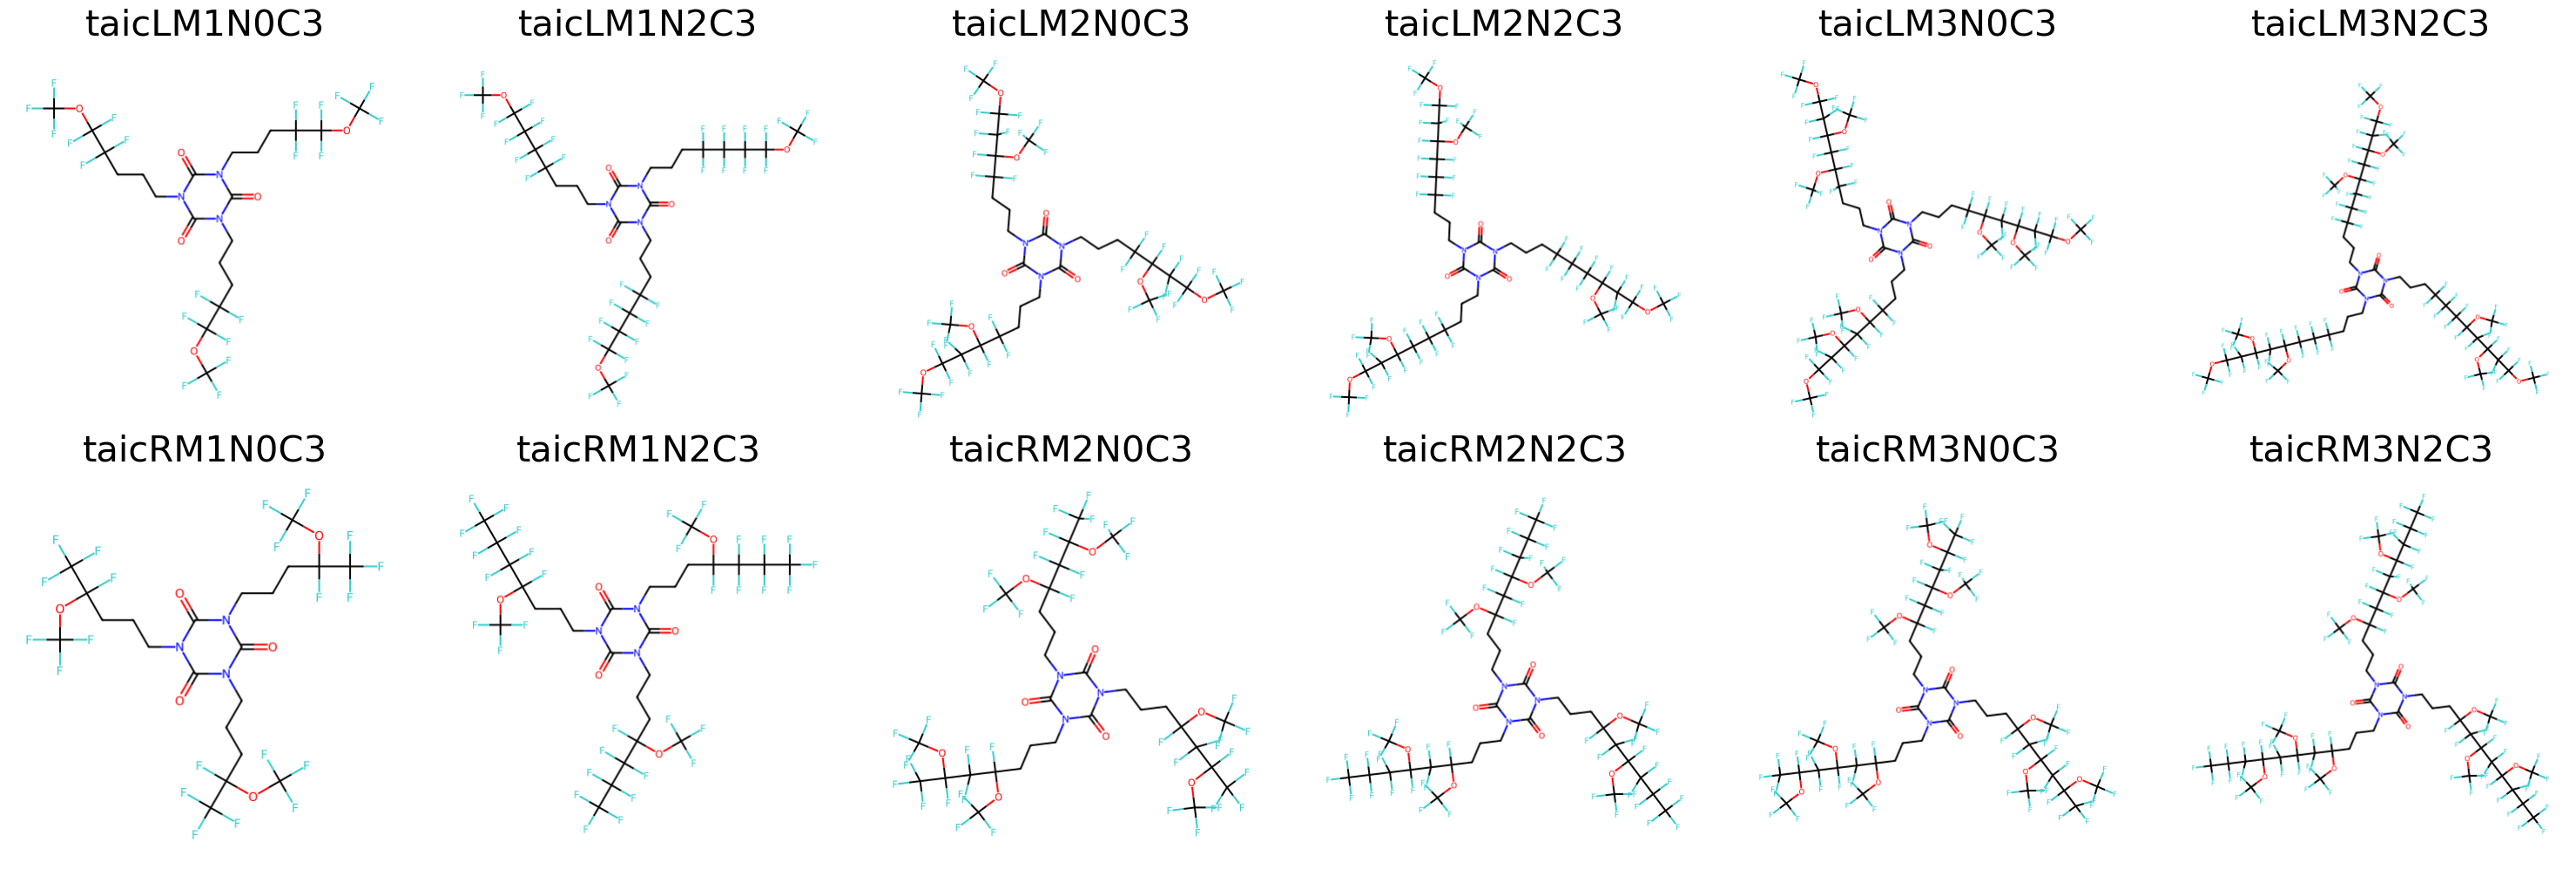

In [14]:
vis.multi_mol_plot(smiles_list = smiles_list,name_list = name_list,cols=6,save_name='taic_crosslink_test.pdf')

# 高斯计算

**计算方法，计算基组，参数设置**

In [15]:
method = 'CAM-B3LYP'
basis = '6-31G(d,p)'
PCM = 'True'
EPS = 4.9
iteration = 1
debug = False

**根据smiles表达式生成分子的xyz文件**

In [ ]:
for i in tqdm(range(len(name_list))):
    for j in range(iteration):
        try:
            utils.smile2xyz(name_list[i]+str(j)+'_0.xyz',smiles_list[i],randomSeed=None)
        except:
            print(name_list[i]+str(j))

**进行高斯计算**

In [ ]:
import gaussian_cal

G0 = gaussian_cal.GaussianCal(method=method,basis=basis,charge='neu',wfn=True,debug=debug,PCM=PCM,EPS=EPS)
G1 = gaussian_cal.GaussianCal(method=method,basis=basis,charge='pos',wfn=True,debug=debug,PCM=PCM,EPS=EPS)

for i in range(len(name_list)):
    for j in range(iteration):
        if os.path.exists(f"{name_list[i]}{j}"):
            if debug:
                while utils.i8cpu_running():
                    time.sleep(60)
            G0.Run(f"{name_list[i]}{j}_0.xyz")
            if debug:
                while utils.i8cpu_running():
                    time.sleep(60)
            G1.Run(f"{name_list[i]}{j}_0.xyz")

# 数据分析

In [74]:
importlib.reload(dp)

<module 'data_process' from '/work/01/gq54/p23004/electret_cal/data_process.py'>

In [48]:
current_directory = os.getcwd()
# 获取当前目录下所有文件夹的名称
folders = [folder for folder in os.listdir(current_directory) if os.path.isdir(folder)]
# 找出以 A 开头的文件夹名称并存放在列表中
name_list = [folder[0:-1] for folder in folders if folder.startswith('A')]
print(name_list)

['A89269359', 'A15322697', 'A89169074', 'A90265042', 'A68747439', 'A90265042', 'A155767072', 'A12612564', 'A140011603', 'A15051391', 'A469353', 'A155767072', 'A15051391', 'A101375506', 'A20188883', 'A167189779', 'A15322697', 'A15322697', 'A15414735', 'A12612564', 'A137495079', 'A89141817', 'A134296113', 'A15414735', 'A2293360', 'A13525078', 'A118198862', 'A89305370', 'A89141817', 'A137495078', 'A137495078', 'A90265042', 'A58472088', 'A14401314', 'A334954', 'A101375506', 'A23042185', 'A130316971', 'A163913855', 'A157680575', 'A12612565', 'A167189779', 'A132041350', 'A130316971', 'A90243281', 'A94915', 'A23042184', 'A163913855', 'A140011603', 'A145235579', 'A163913855', 'A89141817', 'A59116104', 'A15620668', 'A118198862', 'A15620668', 'A59116104', 'A157680575', 'A89716277', 'A90243281', 'A145235579', 'A89169074', 'A137495079', 'A12455325', 'A117012', 'A146274067', 'A90417328', 'A167189779', 'A13931', 'A90417328', 'A94974', 'A137495079', 'A15322699', 'A12455325', 'A23042185', 'A89716277',

In [ ]:
IP_list = []
for i in range(iteration):
    IP_list.append([])
    for j in tqdm(range(len(name_list))):
        IP_list[i].append(dp.charge_calculation(name_list[j] + str(i),"IP"))
df_IP = pd.DataFrame(IP_list, columns = name_list)


In [75]:
# def prop_df(name_list,iteration,prop):
#     prop_list = []
#     for i in range(iteration):
#         prop_list.append([])
#         for j in tqdm(range(len(name_list))):
#             if prop in ["IP","EA"]:
#                 prop_list[i].append(charge_calculation(name_list[j] + str(i),prop))
#             elif prop in ["HOMO", "LUMO","HOMOn1"]:
#                 prop_list[i].append(prop_calculation(name_list[j] + str(i),prop))
#     df_prop = pd.DataFrame(prop_list, columns = name_list)
#     return df_prop
df_IP_raw = dp.prop_df(name_list,iteration,"IP")

 15%|█▍        | 23/155 [00:00<00:01, 69.41it/s]

Error: [Errno 2] No such file or directory: 'A4693531/A4693531_p1.log'
Error: [Errno 2] No such file or directory: 'A22933601/A22933601_p1.log'
Error: [Errno 2] No such file or directory: 'A135250781/A135250781_p1.log'


 31%|███       | 48/155 [00:00<00:01, 90.67it/s]

Error: [Errno 2] No such file or directory: 'A144013141/A144013141_p1.log'
Error: [Errno 2] No such file or directory: 'A3349541/A3349541_p1.log'
Error: [Errno 2] No such file or directory: 'A949151/A949151_p1.log'


 49%|████▉     | 76/155 [00:00<00:01, 76.45it/s]

Error: [Errno 2] No such file or directory: 'A1170121/A1170121_p1.log'


 68%|██████▊   | 105/155 [00:01<00:00, 78.83it/s]

Error: [Errno 2] No such file or directory: 'A105268361/A105268361_p1.log'
Error: [Errno 2] No such file or directory: 'A19083711/A19083711_p1.log'


100%|██████████| 155/155 [00:02<00:00, 76.80it/s]


Error: [Errno 2] No such file or directory: 'A211155761/A211155761_p1.log'
Error: [Errno 2] No such file or directory: 'A444117591/A444117591_p1.log'


 15%|█▌        | 24/155 [00:00<00:01, 74.15it/s]

Error: [Errno 2] No such file or directory: 'A4693532/A4693532_p1.log'
Error: [Errno 2] No such file or directory: 'A22933602/A22933602_p1.log'
Error: [Errno 2] No such file or directory: 'A135250782/A135250782_p1.log'


 27%|██▋       | 42/155 [00:00<00:01, 78.39it/s]

Error: [Errno 2] No such file or directory: 'A144013142/A144013142_p1.log'
Error: [Errno 2] No such file or directory: 'A3349542/A3349542_p1.log'
Error: [Errno 2] No such file or directory: 'A949152/A949152_p1.log'


 48%|████▊     | 75/155 [00:01<00:01, 74.52it/s]

Error: [Errno 2] No such file or directory: 'A1170122/A1170122_p1.log'


 68%|██████▊   | 106/155 [00:01<00:00, 70.06it/s]

Error: [Errno 2] No such file or directory: 'A105268362/A105268362_p1.log'
Error: [Errno 2] No such file or directory: 'A19083712/A19083712_p1.log'


100%|██████████| 155/155 [00:02<00:00, 72.64it/s]

Error: [Errno 2] No such file or directory: 'A211155762/A211155762_p1.log'
Error: [Errno 2] No such file or directory: 'A444117592/A444117592_p1.log'


In [76]:
def data_wash(df):
    df.replace(0, np.nan, inplace=True)
    mean_values = df.mean()
    df.fillna(mean_values, inplace=True)
    return df
data_wash(df_IP)
df_IP

,A89269359,A15322697,A89169074,A90265042,A68747439,A90265042,A155767072,A12612564,A140011603,A15051391,...,A21115576,A155767072,A118198862,A45844598,A152868161,A12612565,A60341562,A44411759,A59116104,A15322699
0,7.643272,9.126797,8.531294,7.597125,8.590119,7.597125,8.536985,9.609140,9.348825,9.259259,...,NaN,8.536985,8.915869,9.173926,8.560960,9.087897,8.035188,7.480468,8.424312,8.935591
1,7.606357,9.026683,8.524290,7.678063,8.552347,7.678063,8.505927,9.334637,9.322891,9.088915,...,NaN,8.505927,8.915869,9.576850,8.570556,8.839554,8.038168,7.480468,8.817476,8.933725
2,7.482161,9.076740,8.562007,7.621595,8.568989,7.621595,8.498251,9.257095,9.374759,9.101990,...,NaN,8.498251,8.915869,9.542829,8.563417,9.696972,8.036896,7.480468,8.325135,8.934658


In [72]:
len(name_list)

155